In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_paths = {
    "zillow": "./data/out/zillow.csv",
    "zillow+demographics": "./data/out/zillow+demographics.csv",
    "zillow_market_2018+": "./data/out/zillow_market_2018+.csv",
    "data.gov_personal_income": "./data/in/data.gov_personal_income.csv",
}

## Demographics

In [3]:
df = pd.read_csv(data_paths["data.gov_personal_income"])
df["Year"] = df["Year"].astype(int)
df["Population Count"] = df["Population Count"].apply(lambda x: x.replace(",", "")).astype(int)
df.head()

,Year,Age,Gender,Educational Attainment,Race,Personal Income,Population Count
0,2010,00 to 17,Male,High school or equivalent,White,"$5,000 to $9,999",989
1,2010,00 to 17,Male,High school or equivalent,White,"$10,000 to $14,999",0
2,2010,00 to 17,Male,High school or equivalent,White,"$15,000 to $24,999",78
3,2010,00 to 17,Male,High school or equivalent,White,"$25,000 to $34,999",123
4,2010,00 to 17,Male,High school or equivalent,White,"$35,000 to $49,999",0


### Gender/Income/Population

In [4]:
gpc_df = (
    df[(df["Age"] != "00 to 17") & (df["Age"] != "65 to 80+")]
    .drop(columns=["Year", "Age", "Educational Attainment", "Race"])
    .groupby(["Gender", "Personal Income"])
    .sum()
    .reset_index()
    .copy()
)
gpc_df.head()

,Gender,Personal Income,Population Count
0,Female,"$10,000 to $14,999",16489540
1,Female,"$15,000 to $24,999",24159098
2,Female,"$25,000 to $34,999",18187933
3,Female,"$35,000 to $49,999",19689497
4,Female,"$5,000 to $9,999",15609153


In [5]:
income_order = [
    "No Income",
    "$5,000 to $9,999",
    "$10,000 to $14,999",
    "$15,000 to $24,999",
    "$25,000 to $34,999",
    "$35,000 to $49,999",
    "$50,000 to $74,999",
    "$75,000 and over",
]

gpc_df["Personal Income"] = pd.Categorical(
    gpc_df["Personal Income"], categories=income_order, ordered=True
)

gpc_df = gpc_df.sort_values(by=["Personal Income"]).reset_index(drop=True)

gpc_df.head()

,Gender,Personal Income,Population Count
0,Female,No Income,126579082
1,Male,No Income,89060614
2,Female,"$5,000 to $9,999",15609153
3,Male,"$5,000 to $9,999",11343483
4,Female,"$10,000 to $14,999",16489540


In [6]:
gpc_male = (
    gpc_df[gpc_df["Gender"] == "Male"]
    .drop(columns=["Gender"])
    .reset_index(drop=True)
    .copy()
)
gpc_fmle = (
    gpc_df[gpc_df["Gender"] == "Female"]
    .drop(columns=["Gender"])
    .reset_index(drop=True)
    .copy()
)

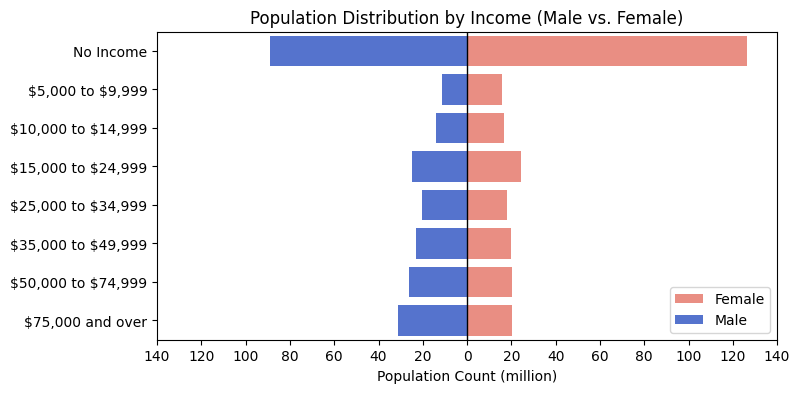

In [7]:
gpc_butterfly = gpc_male.merge(
    gpc_fmle, on="Personal Income", suffixes=("_Male", "_Female")
)
gpc_butterfly["Population Count_Male"] *= -1
plt.figure(figsize=(8, 4))
labels = gpc_butterfly["Personal Income"].astype(str).str.replace("$", "\\$")

sns.barplot(
    data=gpc_butterfly,
    y=labels,
    x="Population Count_Female",
    color="salmon",
    label="Female",
    errorbar=None,
)

sns.barplot(
    data=gpc_butterfly,
    y=labels,
    x="Population Count_Male",
    color="royalblue",
    label="Male",
    errorbar=None,
)

plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Population Count (million)")
plt.ylabel("")
plt.title("Population Distribution by Income (Male vs. Female)")
plt.legend(loc="lower right")
plt.xticks(
    np.linspace(-140_000_000, 140_000_000, 15),
    labels=[int(x) for x in np.abs(np.linspace(-140, 140, 15))],
)

plt.show()

### Gender/Education/Population

In [8]:
gec_df = (
    df[
        (df["Age"] != "00 to 17")
        & (df["Age"] != "65 to 80+")
        & (df["Educational Attainment"] != "Children under 15")
    ]
    .drop(columns=["Year", "Age", "Personal Income", "Race"])
    .groupby(["Gender", "Educational Attainment"])
    .sum()
    .reset_index()
    .copy()
)
gec_df.head()

,Gender,Educational Attainment,Population Count
0,Female,Bachelor's degree or higher,69602567
1,Female,High school or equivalent,54567146
2,Female,No high school diploma,52574679
3,Female,"Some college, less than 4-yr degree",84534534
4,Male,Bachelor's degree or higher,51161979


In [9]:
edu_order = [
    "No high school diploma",
    "High school or equivalent",
    "Some college, less than 4-yr degree",
    "Bachelor's degree or higher",
]

gec_df["Educational Attainment"] = pd.Categorical(
    gec_df["Educational Attainment"], categories=edu_order, ordered=True
)


gec_df = gec_df.sort_values(by=["Educational Attainment"]).reset_index(drop=True)

gec_df.head()

,Gender,Educational Attainment,Population Count
0,Female,No high school diploma,52574679
1,Male,No high school diploma,44037056
2,Female,High school or equivalent,54567146
3,Male,High school or equivalent,72614453
4,Female,"Some college, less than 4-yr degree",84534534


In [10]:
gec_male = (
    gec_df[gec_df["Gender"] == "Male"]
    .drop(columns=["Gender"])
    .reset_index(drop=True)
    .copy()
)
gec_fmle = (
    gec_df[gec_df["Gender"] == "Female"]
    .drop(columns=["Gender"])
    .reset_index(drop=True)
    .copy()
)

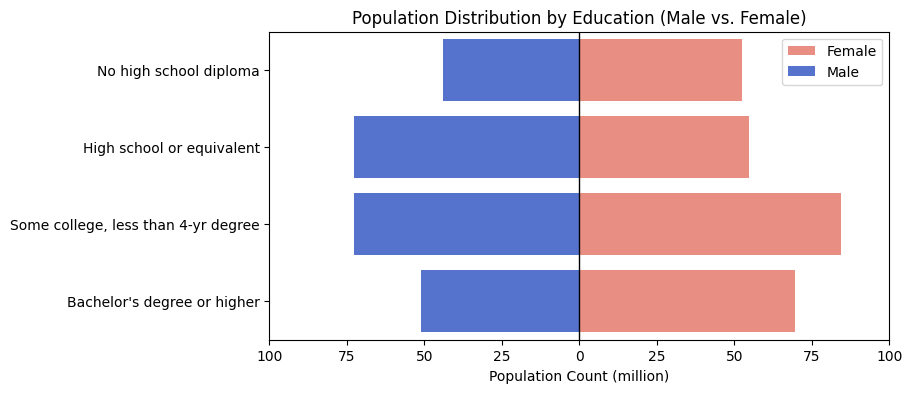

In [11]:
gec_butterfly = gec_male.merge(
    gec_fmle, on="Educational Attainment", suffixes=("_Male", "_Female")
)
gec_butterfly["Population Count_Male"] *= -1
plt.figure(figsize=(8, 4))
labels = gec_butterfly["Educational Attainment"].astype(str).str.replace("$", "\\$")

sns.barplot(
    data=gec_butterfly,
    y=labels,
    x="Population Count_Female",
    color="salmon",
    label="Female",
    errorbar=None,
)

sns.barplot(
    data=gec_butterfly,
    y=labels,
    x="Population Count_Male",
    color="royalblue",
    label="Male",
    errorbar=None,
)

plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Population Count (million)")
plt.ylabel("")
plt.title("Population Distribution by Education (Male vs. Female)")
plt.legend(loc="upper right")
plt.xticks(
    np.linspace(-100_000_000, 100_000_000, 9),
    labels=[int(x) for x in np.abs(np.linspace(-100, 100, 9))],
)

plt.show()

### Income/Year

In [12]:
iy_df = (
    df[(df["Age"] != "00 to 18") & (df["Age"] != "65 to 80+")]
    .drop(columns=["Gender", "Age", "Educational Attainment", "Race"])
    .groupby(["Year", "Personal Income"])
    .sum()
    .reset_index()
    .copy()
)
iy_df.head()

,Year,Personal Income,Population Count
0,2008,"$10,000 to $14,999",2041160
1,2008,"$15,000 to $24,999",3229312
2,2008,"$25,000 to $34,999",2435066
3,2008,"$35,000 to $49,999",2783267
4,2008,"$5,000 to $9,999",1822915


In [13]:
iy_df["Personal Income"] = iy_df["Personal Income"].astype(str).str.replace("$", "\\$")
income_order = [
    "\\$75,000 and over",
    "\\$50,000 to \\$74,999",
    "\\$35,000 to \\$49,999",
    "\\$25,000 to \\$34,999",
    "\\$15,000 to \\$24,999",
    "\\$10,000 to \\$14,999",
    "\\$5,000 to \\$9,999",
    "No Income",
]

iy_df["Personal Income"] = pd.Categorical(
    iy_df["Personal Income"], categories=income_order, ordered=True
)
iy_df = iy_df.sort_values(["Year", "Personal Income"])
iy_df.head()

,Year,Personal Income,Population Count
6,2008,"\$75,000 and over",2644903
5,2008,"\$50,000 to \$74,999",2874533
3,2008,"\$35,000 to \$49,999",2783267
2,2008,"\$25,000 to \$34,999",2435066
1,2008,"\$15,000 to \$24,999",3229312


In [14]:
iy_df=iy_df[iy_df["Personal Income"]!="No Income"]
iy_df=iy_df[iy_df["Year"]>2010]

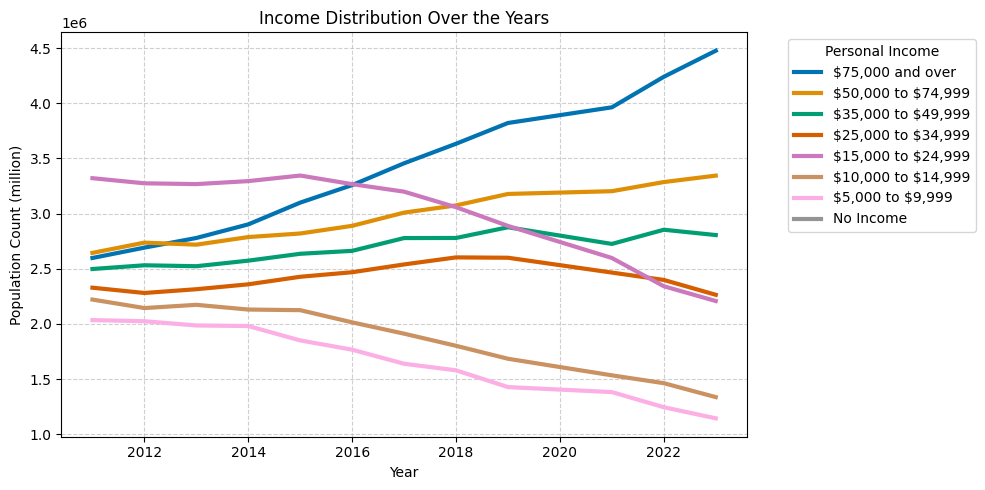

In [15]:
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=iy_df,
    x="Year",
    y="Population Count",
    hue="Personal Income",
    palette="colorblind",
    linewidth=3,
    markersize=10,
)

plt.xlabel("Year")
plt.ylabel("Population Count (million)")
plt.title("Income Distribution Over the Years")
plt.legend(
    title="Personal Income",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()